In [115]:
## Initialization
#pakages
ENV["JULIA_PKG_SERVER"] = "https://jp.pkg.julialang.org"
using Pkg
using CSV
using DataFrames
using DifferentialEquations
using Interpolations
using Plots




#             1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
stoi_mat = [  1  -1  0  -1  1;
              0  1  -1  -1  1;
              0  0  0    1  -1;
              0  0  0    1  -1;
]


function schematic_MM(du, u, p, t)
  f = [1, u[1], u[2]*u[2], (u[1]*u[1])*(u[2]), (u[3]*u[3]*u[3])*(u[4]*u[4])]
  r = p .* f
  du_vec = stoi_mat * r
  # du = du_vec
  du[1] = du_vec[1]
  du[2] = du_vec[2]
  du[3] = du_vec[3]
  du[4] = du_vec[4]
end

p1 = [0.2 * 2* 3, 
      0.4 * 2* 3, 
      0.6 * 2* 3, 
      1.2 * 2* 3, 
      0.2 * 2* 3]


#u0 = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#      10, 10, 10, 10,  5,  10, 5, 10, 10, 10,
#      10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

#u0 = [0.5000007134955281,
# 0.5773509724526737,
# 0.9716414407008213,
# 0.9716414407008213]   
u0 =  [0.500001,   0.577351,   3.16525,  0.165253]
    
    

tspan1 = (0.0, 10.0)

prob1 = ODEProblem(schematic_MM,u0,tspan1,p1)
sol1 = solve(prob1, Vern9())
sol_mat1 = reduce(hcat,sol1.u)'

55×4 adjoint(::Matrix{Float64}) with eltype Float64:
 0.500001  0.577351  3.16525  0.165253
 0.487688  0.564392  3.18033  0.180334
 0.488411  0.564743  3.18183  0.181834
 0.49075   0.566769  3.18314  0.183146
 0.492226  0.568224  3.18384  0.183846
 0.494199  0.570342  3.18478  0.18478
 0.495523  0.571858  3.18541  0.185415
 0.496791  0.573368  3.18602  0.186028
 0.497728  0.574513  3.18648  0.186482
 0.498388  0.575332  3.1868   0.186802
 ⋮                            
 0.500002  0.577352  3.18759  0.187589
 0.500002  0.577352  3.18759  0.187589
 0.500002  0.577352  3.18759  0.187589
 0.500002  0.577352  3.18759  0.187589
 0.500002  0.577352  3.18759  0.187589
 0.500002  0.577352  3.18759  0.187589
 0.500002  0.577352  3.18759  0.187589
 0.500002  0.577352  3.18759  0.187589
 0.5       0.577351  3.18759  0.187591

In [116]:
length1 = size(sol_mat1)[1]

55

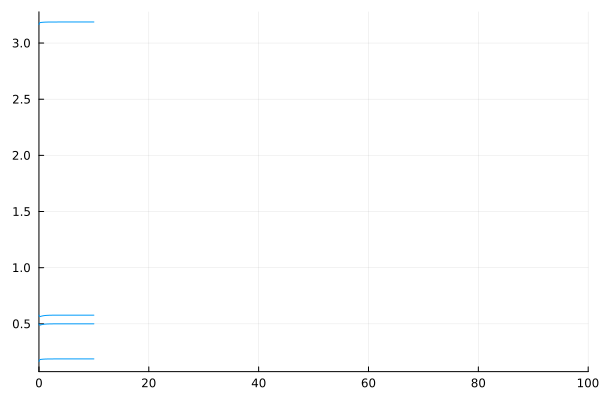

In [117]:
plot(sol1.t[1:length1], sol_mat1[1:length1, 1:4], xlims = (0, 100), label = "", color = 1)

In [118]:
sol_mat1[length1,:]

4-element Vector{Float64}:
 0.5000002472602091
 0.5773505076529457
 3.18758785515978
 0.18759085515978155

In [119]:
flux_mat1 = zeros((size(sol_mat1)[1], 5))
for i in 1:size(sol_mat1)[1]
  u = copy(sol_mat1[i,:])
  f1 = [1, u[1], u[2]*u[2], (u[1]*u[1])*(u[2]), (u[3]*u[3]*u[3])*(u[4]*u[4])]
  r1 = p1 .* f1
  flux_mat1[i,:] = r1
end

10.0

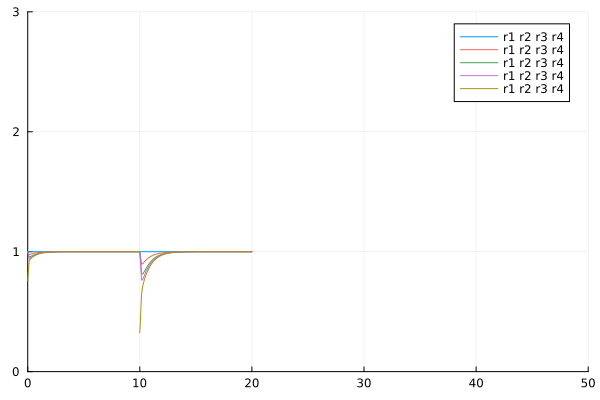

In [132]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[3] = u02[3]-1
tspan2 = (10.0, 20.0)
print(sol1.t[length1])

prob2 = ODEProblem(schematic_MM,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 5))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1], u[2]*u[2], (u[1]*u[1])*(u[2]), (u[3]*u[3]*u[3])*(u[4]*u[4])]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot(sol1.t[1:length1], norm_flux_mat1[1:length1,1:5], xlims = (0, 50), ylim = (0.5, 1.5), label = "", color = [1 2 3 4 5])
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])

In [133]:
p3 = copy(p2)
u03 = sol_mat2[length2,:]
p3[5] = 1.5 * p3[5]
tspan3 = (20.0, 30.0)
print(sol1.t[length1])

prob3 = ODEProblem(schematic_MM,u03,tspan3,p3)
sol3 = solve(prob3, Vern9())
sol_mat3 = reduce(hcat,sol3.u)'

length3 = size(sol_mat3)[1]
flux_mat3 = zeros((size(sol_mat3)[1], 5))
for i in 1:size(sol_mat3)[1]
  u = copy(sol_mat3[i,:])
  f3 = [1, u[1], u[2]*u[2], (u[1]*u[1])*(u[2]), (u[3]*u[3]*u[3])*(u[4]*u[4])]
  r3 = p3 .* f3
  flux_mat3[i,:] = r3
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
end

plot!(sol3.t[1:length3], norm_flux_mat3[1:length3,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])

10.0

DomainError: DomainError with -0.0968265266183917:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [122]:
p4 = copy(p3)
u04 = sol_mat3[length3,:]
p4[1] = 1.2 * p4[1]
tspan4 = (30.0, 50.0)
print(sol1.t[length1])

prob4 = ODEProblem(schematic_MM,u04,tspan4,p4)
sol4 = solve(prob4, Vern9())
sol_mat4 = reduce(hcat,sol4.u)'

length4 = size(sol_mat4)[1]
flux_mat4 = zeros((size(sol_mat4)[1], 5))
for i in 1:size(sol_mat4)[1]
  u = copy(sol_mat4[i,:])
  # f4 = [1, u[1], u[2]*u[2], (u[1]*u[1])*(u[2]), (u[3]*u[3]*u[3])*(u[4]*u[4])]
  f4 = [1, u[1], u[2]*u[2], (u[1]*u[1])*(u[2]^0.5), (u[3]*u[3]*u[3])*(u[4]*u[4])]
  r4 = p4 .* f4
  flux_mat4[i,:] = r4
end

10.0

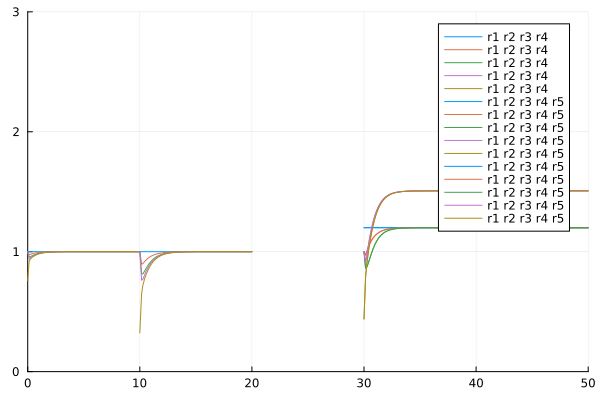

In [127]:


norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))
norm_flux_mat4 = zeros(size(flux_mat4))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
  norm_flux_mat4[:,j] = flux_mat4[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))
norm_sol_mat4 = zeros(size(sol_mat4))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
  norm_sol_mat4[:,j] = sol_mat4[:,j] / sol_mat1[end,j]
end

plot!(sol4.t[1:length4], norm_flux_mat4[1:length4,1:5], label = "r1 r2 r3 r4 r5", color = [1 2 3 4 5])

In [128]:
norm_flux_mat4

117×5 Matrix{Float64}:
 1.2  1.0       1.0       1.0       0.438692
 1.2  0.971634  0.862968  0.909921  0.786682
 1.2  0.99551   0.867439  0.956426  0.881463
 1.2  1.03463   0.901783  1.04315   0.98902
 1.2  1.06145   0.936054  1.10822   1.0628
 1.2  1.09121   0.982757  1.18558   1.14959
 1.2  1.11255   1.02109   1.24424   1.2152
 1.2  1.13212   1.0591    1.30022   1.27765
 1.2  1.14696   1.08929   1.34396   1.32635
 1.2  1.15932   1.11499   1.38111   1.36763
 ⋮                                  
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.20001   1.20001   1.50717   1.50712
 1.2  1.2       1.2       1.50716   1.50715

In [125]:
1.2^3

1.728

In [126]:
savefig("RPA_Power.svg")

"/Users/hyukpyohong/Library/CloudStorage/Dropbox/CRN_model_reduction/Code/RPA_Power.svg"

In [75]:
3^2


9